In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

df = pd.read_csv("kdd99.csv", header=None)
df.columns = [f"col{i+1}" for i in range(len(df.columns))]

df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30
0,0.0,215.0,45076.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,n
1,0.0,162.0,4528.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,n
2,0.0,236.0,1228.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,n
3,0.0,233.0,2032.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,n
4,0.0,239.0,486.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,n


In [3]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30
0,0.0,287.0,334.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,n
1,0.0,200.0,426.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.0,0.01,0.03,0.0,0.00,0.0,0.0,n
2,0.0,309.0,4396.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.0,0.02,0.01,0.0,0.00,0.0,0.0,n
3,0.0,199.0,4123.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.0,0.01,0.01,0.0,0.00,0.0,0.0,n
4,0.0,220.0,1534.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.0,0.04,0.09,0.0,0.01,0.0,0.0,n


In [4]:
df.replace('o', 0, inplace=True)
df.replace('n', 1, inplace= True)
df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30
0,0.0,287.0,334.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,1
1,0.0,200.0,426.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.0,0.01,0.03,0.0,0.00,0.0,0.0,1
2,0.0,309.0,4396.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.0,0.02,0.01,0.0,0.00,0.0,0.0,1
3,0.0,199.0,4123.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.0,0.01,0.01,0.0,0.00,0.0,0.0,1
4,0.0,220.0,1534.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.0,0.04,0.09,0.0,0.01,0.0,0.0,1


In [5]:
df.tail()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30
620093,0.0,222.0,306.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.0,0.01,0.00,0.0,0.0,0.0,0.00,1
620094,0.0,231.0,4727.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,1
620095,0.0,227.0,7783.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.00,1
620096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.0,0.07,0.09,0.0,0.0,1.0,0.87,1
620097,0.0,221.0,1953.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.0,0.01,0.02,0.0,0.0,0.0,0.00,1


In [6]:
df=(df-df.min())/(df.max()-df.min())

In [7]:
df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30
0,0.0,0.005262,0.000028,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,1.0
1,0.0,0.003667,0.000036,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.01,0.03,0.0,0.00,0.0,0.0,1.0
2,0.0,0.005666,0.000375,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.02,0.01,0.0,0.00,0.0,0.0,1.0
3,0.0,0.003649,0.000351,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.01,0.01,0.0,0.00,0.0,0.0,1.0
4,0.0,0.004034,0.000131,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.04,0.09,0.0,0.01,0.0,0.0,1.0


In [8]:
RANDOM_SEED = 314
TEST_PCT = 0.2

rcParams['figure.figsize'] = 14, 8.7 
LABELS = ["o","n"]
#col_list = ["cerulean","scarlet"]
#sns.set(style='white', font_scale=1.75, palette=sns.xkcd_palette(col_list))
df.shape

(620098, 30)

In [9]:
df.isnull().values.any()

False

In [12]:
df['col30'].value_counts()

1.0    619046
0.0      1052
Name: col30, dtype: int64

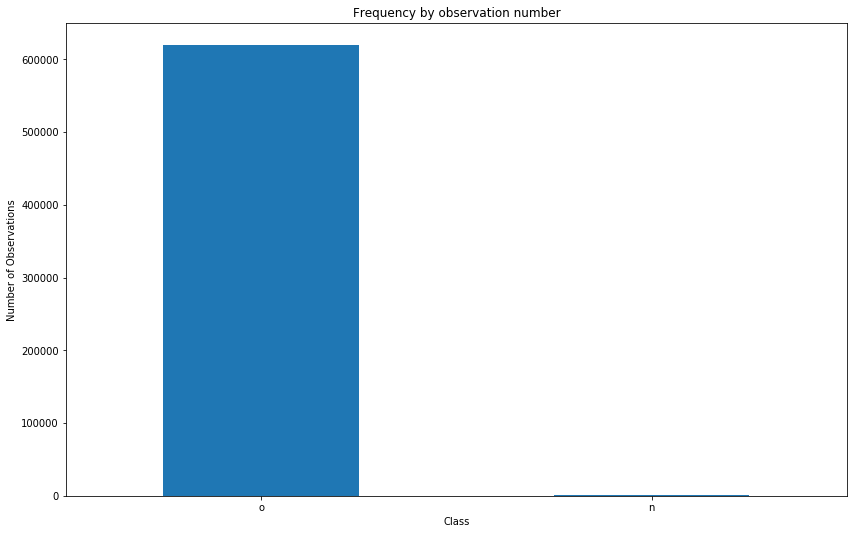

In [11]:
count_classes = pd.value_counts(df['col30'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), LABELS)
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

In [14]:
# normal_df = df[df.a == 0] 
# anamolous_df = df[df.a == 1]
y = df['col30']
X_train, X_test, y_train, y_test = train_test_split(df[[cols for cols in df.columns if cols != 'col30']], y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(496078, 29) (496078,)
(124020, 29) (124020,)


In [15]:
X_train.shape

(496078, 29)

In [20]:
nb_epoch = 20
batch_size = 128
input_dim = X_train.shape[1] #num of columns, 30
encoding_dim = 14
hidden_dim = int(encoding_dim / 2) #i.e. 7
learning_rate = 1e-7

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

cp = ModelCheckpoint(filepath="autoencoder_edge.h5",save_best_only=True,
                               verbose=0)

tb = TensorBoard(log_dir=r'C:\Users\Shubham\work\logs',
                histogram_freq=0,
                write_graph=True,
                write_images=True)

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[cp, tb]).history

Train on 496078 samples, validate on 124020 samples
Epoch 1/20
496078/496078 [==============================] - 6s 12us/step - loss: 0.0071 - accuracy: 0.3222 - val_loss: 0.0035 - val_accuracy: 0.2525
Epoch 2/20
496078/496078 [==============================] - 6s 12us/step - loss: 0.0034 - accuracy: 0.3206 - val_loss: 0.0034 - val_accuracy: 0.3877
Epoch 3/20
496078/496078 [==============================] - 6s 12us/step - loss: 8.1161e-04 - accuracy: 0.3869 - val_loss: 5.0915e-04 - val_accuracy: 0.3750
Epoch 4/20
496078/496078 [==============================] - 6s 12us/step - loss: 4.7309e-04 - accuracy: 0.3696 - val_loss: 4.5665e-04 - val_accuracy: 0.4609
Epoch 5/20
496078/496078 [==============================] - 6s 12us/step - loss: 4.4553e-04 - accuracy: 0.3730 - val_loss: 4.4160e-04 - val_accuracy: 0.2886
Epoch 6/20
496078/496078 [==============================] - 6s 12us/step - loss: 4.3542e-04 - accuracy: 0.3592 - val_loss: 4.3445e-04 - val_accuracy: 0.6417
Epoch 7/20
496078/4960

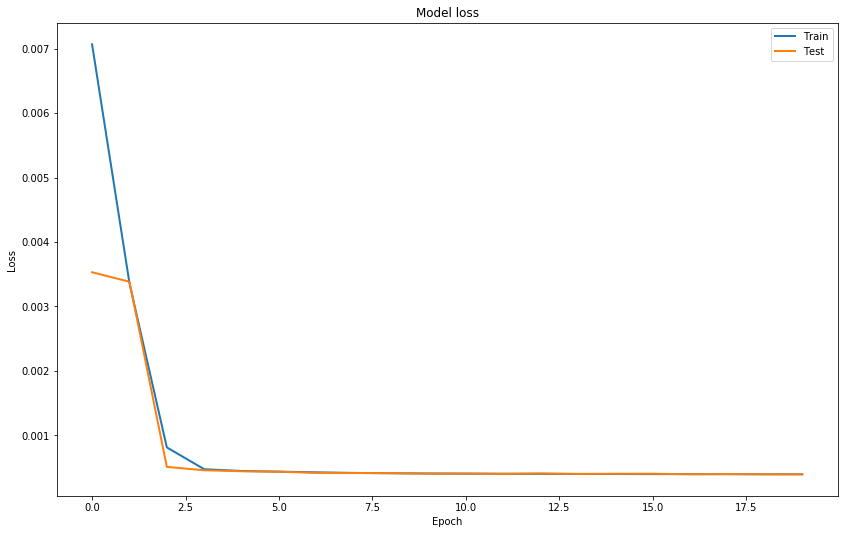

In [22]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [23]:
X_test.iloc[:10].shape

(10, 29)

In [24]:
pre = autoencoder.predict(X_test.iloc[:10])

In [25]:
pre

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        9.9075395e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 5.3438038e-02,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000671e+00, 0.0000000e+00, 3.3779308e-01, 0.0000000e+00,
        1.0049677e+00, 1.0009604e+00, 0.0000000e+00, 3.4322864e-01,
        4.8661873e-02, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 3.6499941e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        9.9996781e-01, 0.0000000e+00, 5.9461311e-02, 9.9677312e-01,
        9.9872577e-01, 9.9776971e-01, 0.0000000e+00, 0.0000000e+00,
        6.9826841e-05, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],


In [26]:
def classifier(X, y):
    model = RandomForestClassifier(verbose=1) 
    model.fit(X,y)
    return model

In [31]:
mod = classifier(autoencoder.predict(df[[cols for cols in df.columns if cols != 'col30']]), y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   14.5s finished


In [32]:
res= mod.predict(autoencoder.predict(df[[cols for cols in df.columns if cols != 'col30']]))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s finished


In [33]:
len(y[y==0])

1052

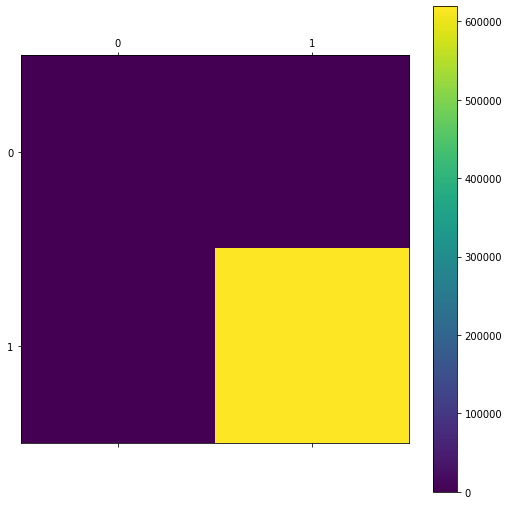

In [39]:
plt.matshow(confusion_matrix(res, y))
plt.colorbar()


In [37]:
print(classification_report(res,y))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1045
         1.0       1.00      1.00      1.00    619053

    accuracy                           1.00    620098
   macro avg       1.00      1.00      1.00    620098
weighted avg       1.00      1.00      1.00    620098



In [41]:
df.loc[res==0, df.columns[20:26]]

,col21,col22,col23,col24,col25,col26
86,0.219608,0.26,0.02,0.01,0.0,0.99
430,0.003922,0.00,0.08,0.00,0.0,1.00
1178,0.247059,0.25,0.36,0.69,0.0,0.00
1316,0.027451,0.03,0.07,0.00,0.0,1.00
1514,0.023529,0.02,0.05,0.00,0.0,1.00
2521,0.172549,0.17,0.04,0.00,0.0,1.00
2578,0.011765,0.01,0.08,0.00,0.0,1.00
3096,0.431373,1.00,0.00,0.01,0.0,0.00
3843,0.043137,0.04,0.07,0.00,0.0,1.00
4110,0.007843,0.02,1.00,0.02,1.0,0.00


In [43]:
mod = classifier(df[[cols for cols in df.columns if cols != 'col30']], df['col30'])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.9s finished


In [44]:
res= mod.predict(df[[cols for cols in df.columns if cols != 'col30']])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished


In [45]:
print(classification_report(res,y))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1051
         1.0       1.00      1.00      1.00    619047

    accuracy                           1.00    620098
   macro avg       1.00      1.00      1.00    620098
weighted avg       1.00      1.00      1.00    620098

